In [1]:
import numpy as np
import pandas as pd

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/mayraberrones/Documents/GitHub/Ciencia_de_Datos/Mineria-datos/insurance.csv")
df.head()

# Let's store the original dataframe in another variable.
original_df = df.copy()

Age Analysis:

Turning Age into Categorical Variables:
Young Adult: from 18 - 35
Senior Adult: from 36 - 55
Elder: 56 or older
Share of each Category: Young Adults (42.9%), Senior Adults (41%) and Elder (16.1%)

In [3]:
# Determine the distribution of charge
charge_dist = df["charges"].values
logcharge = np.log(df["charges"])

df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

Is there a Relationship between BMI and Age
BMI frequency: Most of the BMI frequency is concentrated between 27 - 33.
Correlations Age and charges have a correlation of 0.29 while bmi and charges have a correlation of 0.19
Relationship betweem BMI and Age: The correlation for these two variables is 0.10 which is not that great. Therefore, we can disregard that age has a huge influence on BMI.

In [4]:
bmi = [df["bmi"].values.tolist()]
young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adult = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values

Comparing Independent Categorical Variables (ANOVA)
P-value: The p-value being higher than 0.05 tells us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it comes to Body Mass Index.

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


moore_lm = ols("bmi ~ age_cat", data=df).fit()
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Fri, 13 Mar 2020   Prob (F-statistic):            0.00268
Time:                        08:37:03   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Turning BMI into Categorical Variables:
Under Weight: Body Mass Index (BMI)  <  18.5
Normal Weight: Body Mass Index (BMI)  ≥  18.5 and Body Mass Index (BMI)  <  24.9
Overweight: Body Mass Index (BMI)  ≥  25 and Body Mass Index (BMI)  <  29.9
Obese: Body Mass Index (BMI)  >  30

In [6]:
df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


Weight Status vs Charges
Overweight: Notice how there are two groups of people that get significantly charged more than the other group of overweight people.
Obese: Same thing goes with the obese group, were a significant group is charged more than the other group.

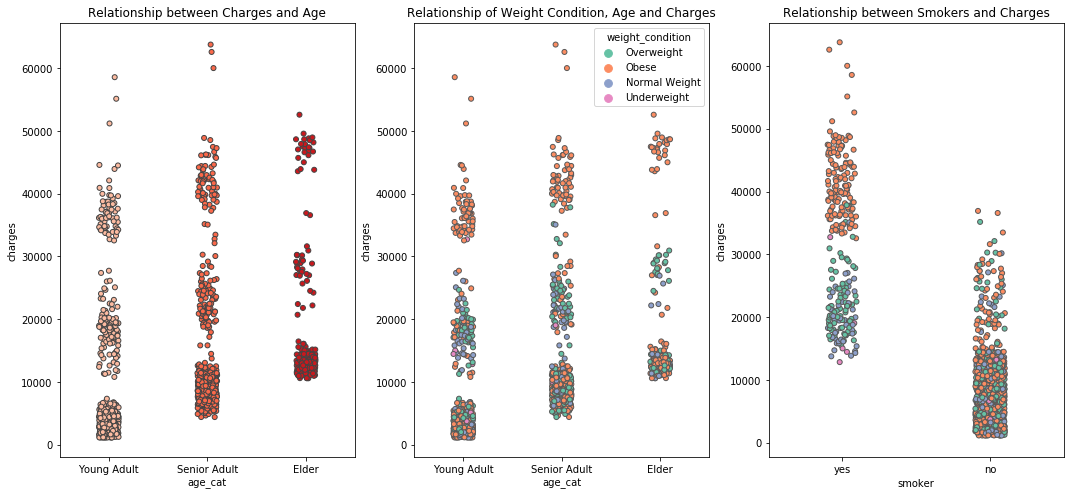

In [7]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

Text(0.5, 1.0, 'Smokers')

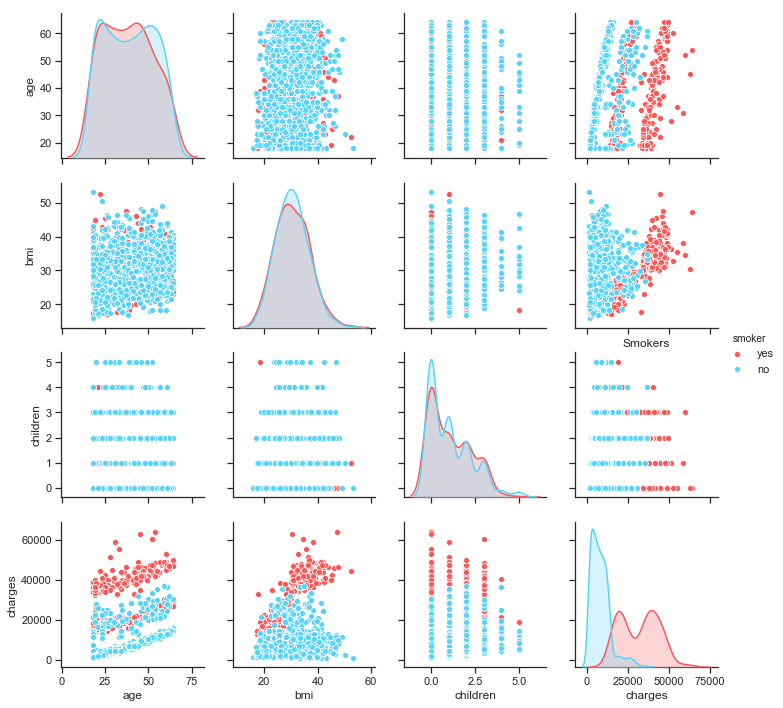

In [8]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

Unsupervised Learning:
Performing Clustering in a Manual Way:
In the first plot we will do a cluster analysis in a manual form and see what our eyes can discover. Here are the following results from the manual cluster analysis performed.
Age and Charges: We can see there is a slight increase in charges depending on the age of the patient.
Obese Clusters: We can see that for each age group there are clusters of the obese group in the top part of charges.
Are these clusters Smokers? As seen in the right chart, most of this clusters are definitely smokers.
This is somewhat the same as we have explored in the previous section, but I wanted to add the factor of age to see until what extent this variable patient's charges. Nevertheless, we can still confirm that being obese and a smoker is the grand major factor at least for the group of obese and overweight patients.

Text(17, 40000, 'The Impact of Smoking to \n Charges on other \n Weight Conditions ')

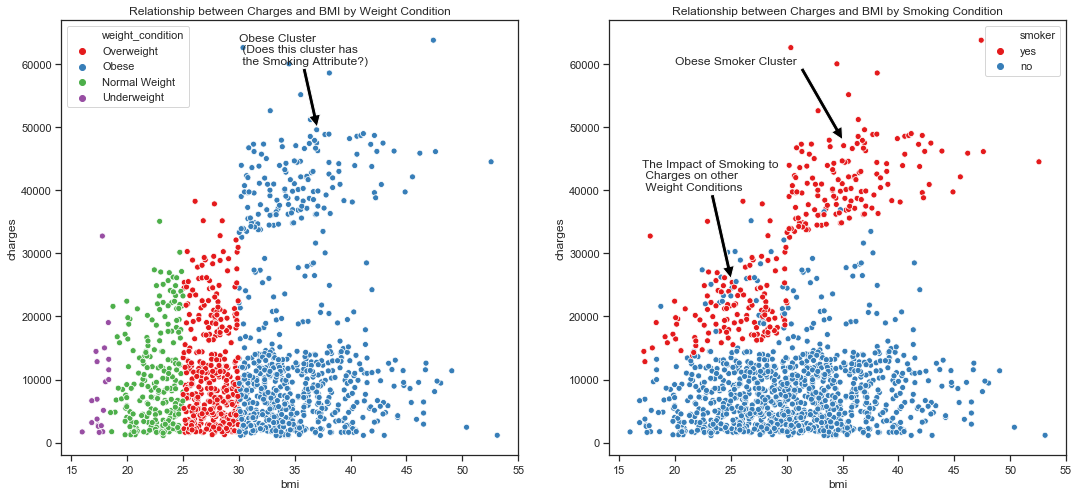

In [9]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="weight_condition", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
ax2.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)

KMeans Neighbors.
The elbow method is mostly used in unsupervised learning algorithms to determine the optimal number of clusters that should be used to find specific unknown groups within our population. We used the yellowbrick library to implement a simple elbow method and to determine the appropiate number of clusters in our KMeans algorithm.

Terms to Know:
Cluster Centroids: The cluster centroid is the most representative point of a specific cluster. So, if we decide to find three clusters, we will have three cluster centroid.
Euclidean Distance: Is the distance between two data points and this term is essential when gathering the distance between the cluster centroids and the data points.
Elbow Method: The elbow method is a technique used to choose the most optimal number of clusters. Remember, in Kmeans clustering we add the number of clusters in a manual way, so the elbow method is useful when using Kmeans. Why is it called the Elbow method? Because as more iterations run to find the optimal number of clusters, the line will take the shape of the arm and the optimal number of clusters is the point that is in the elbow part of the arm.

The elbow method finds the average sum of squares distance between the cluster centroid and the data observations. As the number of cluster increases the average sum of squares decreases. Basically, as the number of clusters increases, the distance between the data points and the centroids decreases as well. Whenever, we see the "elbow" that is a rule of thumb to consider the optimal number of clusters.

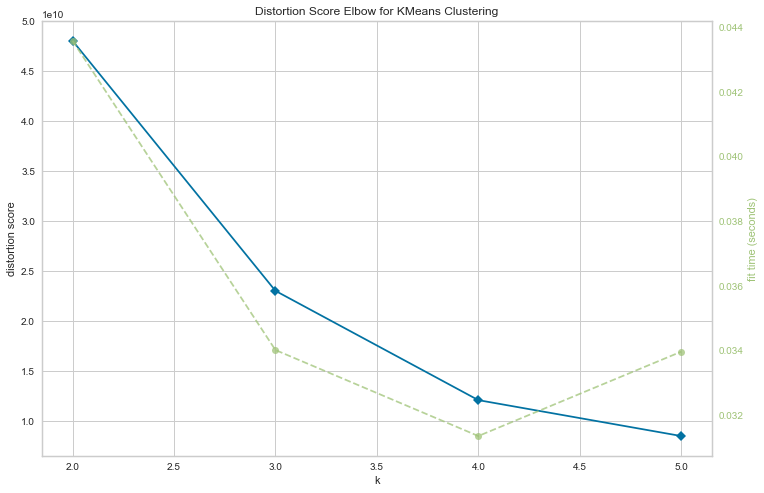

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df.head()
original_df.head()

X = df[["bmi", "charges"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[3.04255012e+01 6.28902757e+03]
 [3.48454321e+01 4.07613086e+04]
 [2.91341883e+01 1.84857697e+04]]
[2 0 0 ... 0 0 2]


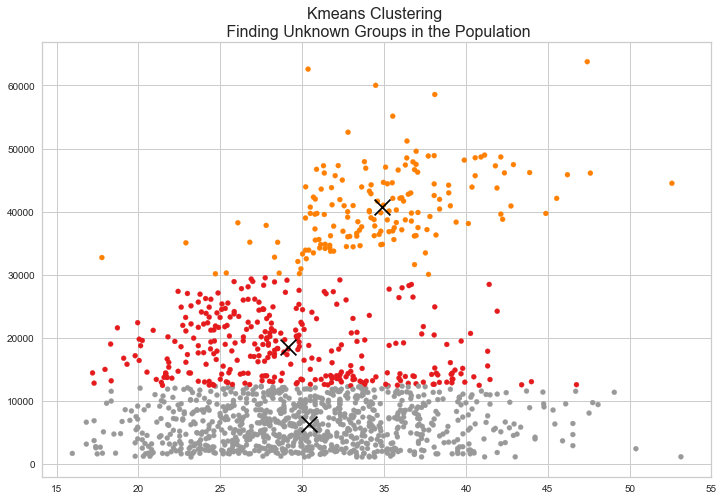

In [13]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

X = df[["bmi", "charges"]]

agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(X)
agglomerative_clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 5% of the data 
sample_df = df.sample(frac=.05)

sample_X = sample_df[["bmi", "charges"]]

sample_agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(sample_X)
sample_agglomerative_clustering


linked = linkage(sample_agglomerative_clustering.children_, 'single')

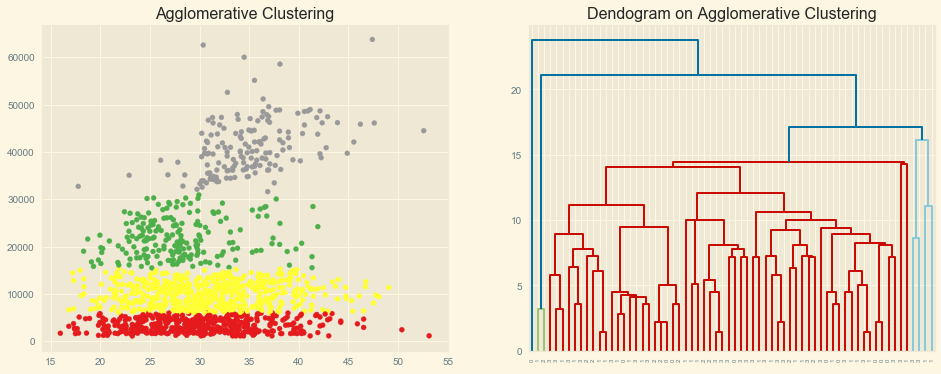

In [17]:
plt.style.use("Solarize_Light2")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

ax1.scatter(X.values[:,0], X.values[:,1], c=agglomerative_clustering.labels_, cmap="Set1_r", s=25)
ax1.set_title("Agglomerative Clustering", fontsize=16)

dendrogram(linked,  
            orientation='top',
            labels=sample_agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=False,
          ax=ax2)

ax2.set_title("Dendogram on Agglomerative Clustering")

plt.show()

In [30]:
from sklearn.model_selection import train_test_split

# Shuffle our dataset before splitting

original_df = original_df.sample(frac=1, random_state=1)

X = original_df.drop("charges", axis=1)
y = original_df["charges"]

# Split into both training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

# Random seed
np.random.seed(42)

# Shuffle Randomly the training set
train = train.sample(frac=1)
train.head()

,age,sex,bmi,children,smoker,region,charges
374,20,male,33.330,0,no,southeast,1391.52870
53,36,male,34.430,0,yes,southeast,37742.57570
835,42,male,35.970,2,no,southeast,7160.33030
692,20,male,32.395,1,no,northwest,2362.22905
930,26,male,46.530,1,no,southeast,2927.06470


In [21]:
model_without_smoking = ols("charges ~ bmi + age", data=train).fit()
print(model_without_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     72.05
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           4.46e-30
Time:                        08:43:39   Log-Likelihood:                -11508.
No. Observations:                1070   AIC:                         2.302e+04
Df Residuals:                    1067   BIC:                         2.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6037.0381   1965.244     -3.072      0.0

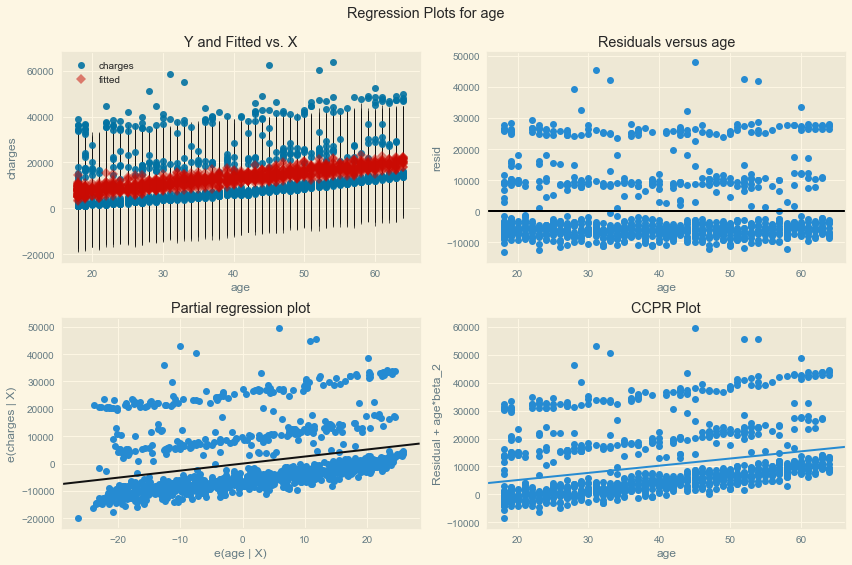

In [22]:
# Age in out X-axis since it has a higher correlation with charges.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_without_smoking, "age", fig=fig)

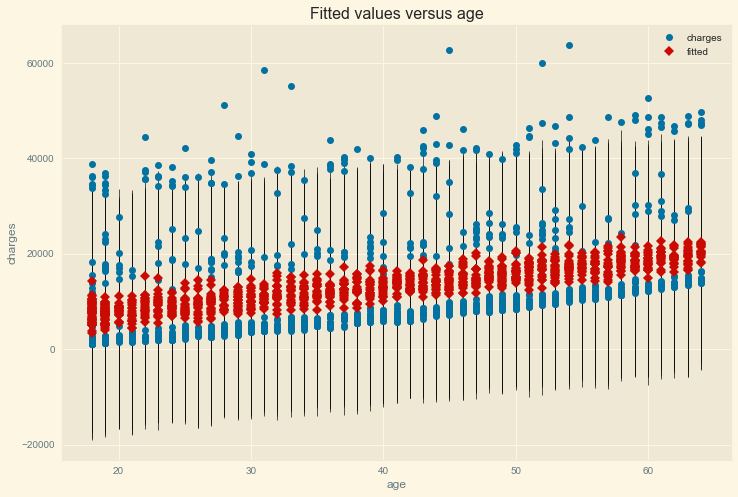

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_without_smoking, "age", ax=ax)

In [24]:
model_with_smoking = ols("charges ~ smoker + bmi + age", data=train).fit()
print(model_with_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1027.
Date:                Fri, 13 Mar 2020   Prob (F-statistic):          7.13e-314
Time:                        08:45:43   Log-Likelihood:                -10849.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.172e+04   1067.793    -10.973

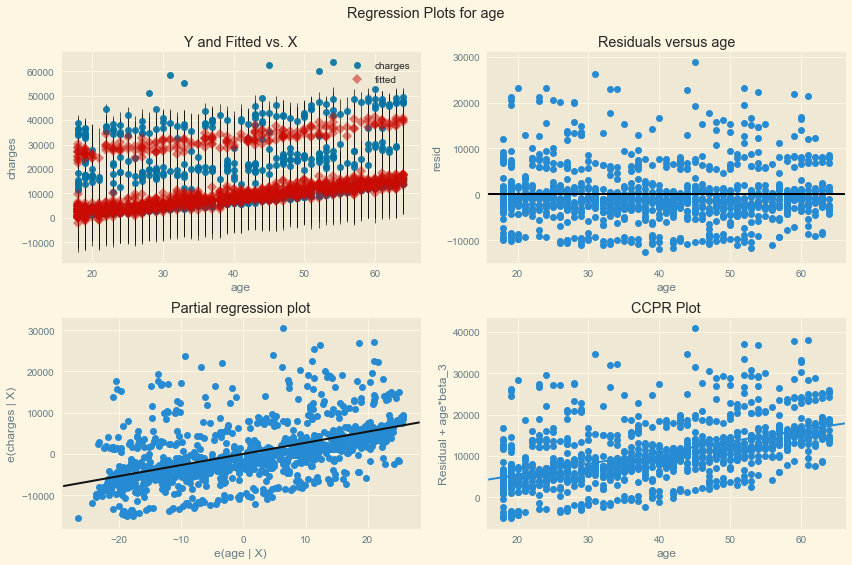

In [25]:
# Age in out X-axis since it has a higher correlation with charges.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_with_smoking, "age", fig=fig)

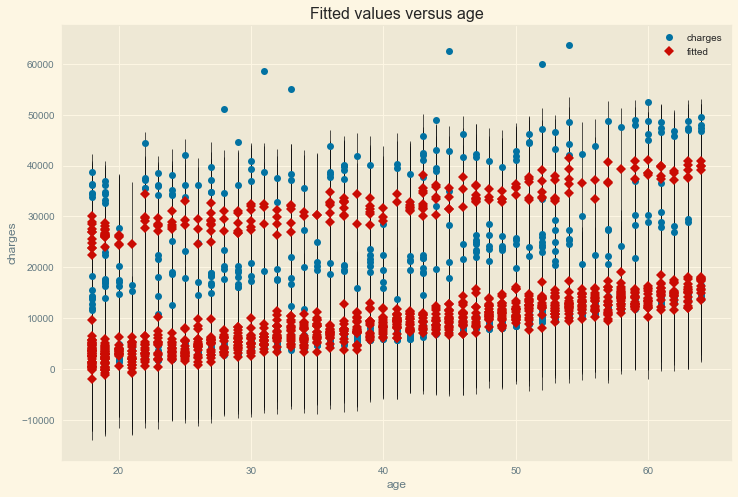

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_with_smoking, "age", ax=ax)